In [1]:
import argparse
from typing import List

from lightglue import LightGlueRunner
from utils import load_image, rgb_to_grayscale
import viz2d

In [2]:
providers = ["CUDAExecutionProvider", "CPUExecutionProvider"]


extractor_path = "/home/user/Light/LightGlue-ONNX/weights/superpoint.onnx"
lightglue_path = "/home/user/Light/LightGlue-ONNX/weights/superpoint_lightglue.onnx"
providers= providers

In [3]:

runner = LightGlueRunner(
        extractor_path=extractor_path,
        lightglue_path=lightglue_path,
        providers=providers,
    )


2024-06-01 21:19:42.201196179 [E:onnxruntime:Default, provider_bridge_ort.cc:1744 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1426 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-06-01 21:19:42.201220388 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:870 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirementsto ensure all dependencies are met.
2024-06-01 21:19:42.371892205 [E:onnxruntime:Default, provider_bridge_ort.cc:1744 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1426 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load lib

In [4]:
img0_path = "/home/user/Light/LightGlue/assets/DSC_0411.JPG"
img1_path = "/home/user/Light/LightGlue/assets/DSC_0410.JPG"


img0_path = "/home/user/Downloads/1.jpeg"
img1_path = "/home/user/Downloads/2.jpeg"


img_size = 512


if isinstance(img_size, List):
    if len(img_size) == 1:
        size0 = size1 = img_size[0]
    elif len(img_size) == 2:
        size0 = size1 = img_size
    elif len(img_size) == 4:
        size0, size1 = img_size[:2], img_size[2:]
    else:
        raise ValueError("Invalid img_size. Please provide 1, 2, or 4 integers.")
else:
    size0 = size1 = img_size

In [5]:
image0, scales0 = load_image(img0_path, resize=size0)
image1, scales1 = load_image(img1_path, resize=size1)

image0 = rgb_to_grayscale(image0)
image1 = rgb_to_grayscale(image1)

In [6]:
m_kpts0, m_kpts1 = runner.run(image0, image1, scales0, scales1)

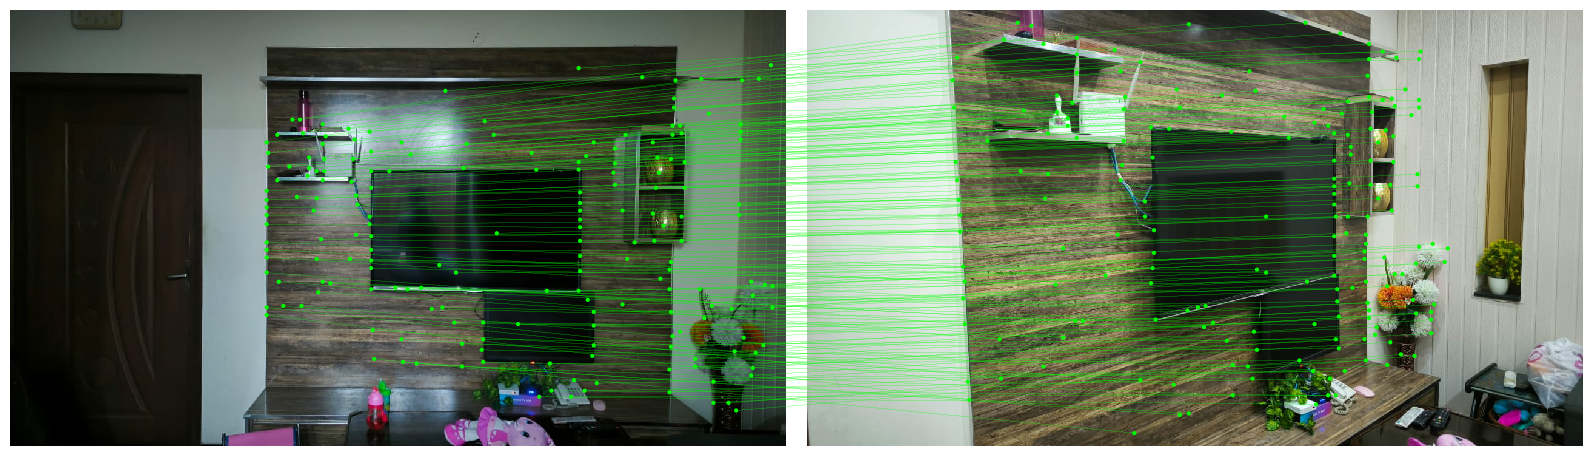

In [7]:
orig_image0, _ = load_image(img0_path)
orig_image1, _ = load_image(img1_path)
viz2d.plot_images(
    [orig_image0[0].transpose(1, 2, 0), orig_image1[0].transpose(1, 2, 0)]
    )
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.plt.show()
print ("Completed!")